# Business Problem: Spanish restaurant location near West Hill, Toronto, CA.

### Pyhon libraries

In [1]:
!pip install wikipedia
!pip install bs4

In [2]:
import wikipedia as wp
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
print (folium.__file__)
print (folium.__version__)

Libraries imported.
/usr/local/lib/python3.6/dist-packages/folium/__init__.py
0.8.3


### Import data

In [0]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")
df = pd.read_html(html, header = 0)[0]
df = df[df.Borough != 'Not assigned']

In [4]:
df

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


In [0]:
df = df.groupby(['Postal Code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [0]:
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

In [7]:
df

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [8]:
df.shape

(103, 3)

#### Toronto neighborhood dataframe with longitude and latitude

In [9]:
coordinates = pd.read_csv('https://cocl.us/Geospatial_data')
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
toronto = pd.merge(df, coordinates, on="Postal Code", how="left")
toronto.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


#### West Hill (Scarborough borough), Toronto Neighborhood Analysis and Clustering

In [11]:
scarborough_data = toronto[toronto['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [12]:
#Let's get the geographical coordinates of Toronto
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.773077, -79.257774.


In [13]:
# create map of Scarborough, Toronto using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(scarborough_data['Latitude'], scarborough_data['Longitude'], scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

#### Venue data

In [14]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'TJYB5WSO5MZKLU2YL2WYQQVDXTVBO401BIOREHPNEWHECMEI' # your Foursquare ID
CLIENT_SECRET = 'YQGZDIY3BIB3DRHGJFHPQDLEANQDXR00HFDQ4JBZPCHNOFJK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID:TJYB5WSO5MZKLU2YL2WYQQVDXTVBO401BIOREHPNEWHECMEI
CLIENT_SECRET:YQGZDIY3BIB3DRHGJFHPQDLEANQDXR00HFDQ4JBZPCHNOFJK


In [0]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [16]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [0]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### How many nearby venues ?

In [18]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(5)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,St. Andrews Fish & Chips,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",43.771865,-79.252645
2,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
3,DAVIDsTEA,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",43.776320,-79.258688
4,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334


#### How many cathegories?

In [19]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
2,SEPHORA,Cosmetics Shop,43.775017,-79.258109
3,DAVIDsTEA,Tea Room,43.776320,-79.258688
4,American Eagle Outfitters,Clothing Store,43.776012,-79.258334


In [20]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store        7
Restaurant            4
Coffee Shop           4
Cosmetics Shop        2
Pharmacy              2
Sandwich Place        2
Gas Station           2
Tea Room              2
Italian Restaurant    1
Jewelry Store         1
Name: categories, dtype: int64

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
Scarborough_venues = getNearbyVenues(names=scarborough_data['Neighborhood'], latitudes=scarborough_data['Latitude'], longitudes=scarborough_data['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


In [23]:
print('There are {} uniques categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()                        

There are 80 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,10,10,10,10,10,10
"Birch Cliff, Cliffside West",8,8,8,8,8,8
Cedarbrae,18,18,18,18,18,18
"Clarks Corners, Tam O'Shanter, Sullivan",25,25,25,25,25,25
"Cliffside, Cliffcrest, Scarborough Village West",5,5,5,5,5,5


## Let's prepare the dataframe for clustering using one-hot-encoding

In [24]:
# one hot encoding
scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

#move neighborhood column to the first column
fixed_columns = ["Neighborhood"] + list(scarborough_onehot.columns.difference(['Neighborhood']))
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Badminton Court,Bakery,Bank,Bar,Beer Store,Board Shop,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Fish Market,Flower Shop,Fried Chicken Joint,Gas Station,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Hardware Store,Hobby Shop,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Moving Target,Noodle House,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool Hall,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Skating Rink,Soccer Field,Spa,Sports Bar,Thai Restaurant,Thrift / Vintage Store,Train Station,Vietnamese Restaurant,Wine Shop,Wings Joint
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
scarborough_onehot.shape

(197, 81)

In [26]:
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped.head()

,Neighborhood,Asian Restaurant,Athletics & Sports,Auto Garage,Badminton Court,Bakery,Bank,Bar,Beer Store,Board Shop,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Fish Market,Flower Shop,Fried Chicken Joint,Gas Station,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Hardware Store,Hobby Shop,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Medical Center,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Moving Target,Noodle House,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool Hall,Rental Car Location,Restaurant,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Skating Rink,Soccer Field,Spa,Sports Bar,Thai Restaurant,Thrift / Vintage Store,Train Station,Vietnamese Restaurant,Wine Shop,Wings Joint
0,Agincourt,0.000000,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.000000,0.000000,0.1,0.100000,0.000,0.00,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.1,0.00,0.0,0.10,0.00,0.0,0.00,0.100,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,"Birch Cliff, Cliffside West",0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.125,0.000000,0.000000,0.0,0.000000,0.125,0.00,0.0,0.125,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.125,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.0
2,Cedarbrae,0.055556,0.055556,0.0,0.0,0.111111,0.055556,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.055556,0.055556,0.0,0.111111,0.000,0.00,0.0,0.000,0.0,0.0,0.00,0.0,0.055556,0.055556,0.055556,0.000,0.0,0.0,0.0,0.055556,0.0,0.055556,0.0,0.0,0.00,0.0,0.111111,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0.0,0.0
3,"Clarks Corners, Tam O'Shanter, Sullivan",0.000000,0.000000,0.0,0.0,0.000000,0.040000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.000,0.000000,0.040000,0.0,0.080000,0.000,0.08,0.0,0.000,0.0,0.0,0.04,0.0,0.000000,0.040000,0.040000,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.04,0.0,0.000000,0.08,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.04,0.0,0.08,0.08,0.0,0.04,0.0,0.04,0.04,0.0,0.04,0.000,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.0
4,"Cliffside, Cliffcrest, Scarborough Village West",0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.0,0.00,0.0,0.000,0.000000,0.200000,0.0,0.000000,0.000,0.00,0.0,0.000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.2,0.0,0.00,0.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.20,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.2


### Lets sort indescending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### New dataframe with top 10 venues per neighborhood

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Coffee Shop,Badminton Court,Lounge,Latin American Restaurant,Skating Rink,Pool Hall,Breakfast Spot,Motorcycle Shop,Sandwich Place
1,"Birch Cliff, Cliffside West",Park,Thai Restaurant,College Stadium,Diner,Skating Rink,Café,General Entertainment,Gas Station,Fried Chicken Joint,Flower Shop
2,Cedarbrae,Indian Restaurant,Bakery,Coffee Shop,Hakka Restaurant,Athletics & Sports,Bank,Board Shop,Caribbean Restaurant,Chinese Restaurant,Flower Shop
3,"Clarks Corners, Tam O'Shanter, Sullivan",Coffee Shop,Intersection,Convenience Store,Pharmacy,Pizza Place,Gas Station,Sandwich Place,Bus Stop,Italian Restaurant,Noodle House
4,"Cliffside, Cliffcrest, Scarborough Village West",Wings Joint,Burger Joint,Pharmacy,Chinese Restaurant,Hardware Store,Grocery Store,Greek Restaurant,Coffee Shop,College Stadium,Convenience Store


#### Lets print the top 5 venues per neighoborhood

In [29]:
num_top_venues = 5

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
             venue  freq
0      Coffee Shop   0.1
1   Breakfast Spot   0.1
2   Clothing Store   0.1
3        Pool Hall   0.1
4  Motorcycle Shop   0.1


----Birch Cliff, Cliffside West----
                   venue  freq
0                   Park  0.25
1  General Entertainment  0.12
2        Thai Restaurant  0.12
3                  Diner  0.12
4                   Café  0.12


----Cedarbrae----
               venue  freq
0  Indian Restaurant  0.11
1             Bakery  0.11
2        Coffee Shop  0.11
3   Asian Restaurant  0.06
4   Hakka Restaurant  0.06


----Clarks Corners, Tam O'Shanter, Sullivan----
               venue  freq
0        Pizza Place  0.08
1           Pharmacy  0.08
2  Convenience Store  0.08
3       Intersection  0.08
4        Coffee Shop  0.08


----Cliffside, Cliffcrest, Scarborough Village West----
                venue  freq
0      Hardware Store   0.2
1        Burger Joint   0.2
2            Pharmacy   0.2
3  Chinese Restaurant   0.2
4         Wings 

### Lets sort indescending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### New dataframe with top 10 venues per neighborhood

## Apply K-means Clustering

In [31]:
# set number of clusters
kclusters = 3

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=6).fit(scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0], dtype=int32)

#### Lets createnew dataframe with the clustering and top 10 venues per neigborhood.

In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_.astype("int"))

scarborough_merged = scarborough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood').dropna()

scarborough_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,2.0,Fast Food Restaurant,Coffee Shop,Hobby Shop,Spa,Wings Joint,College Stadium,Convenience Store,Department Store,Diner,Discount Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1.0,Breakfast Spot,Bar,Burger Joint,Flower Shop,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,2.0,Fast Food Restaurant,Park,Moving Target,Restaurant,Grocery Store,Fried Chicken Joint,Electronics Store,Intersection,Medical Center,Mexican Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0.0,Park,Coffee Shop,Business Service,Chinese Restaurant,College Stadium,Convenience Store,Department Store,Diner,Discount Store,Electronics Store
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2.0,Indian Restaurant,Bakery,Coffee Shop,Hakka Restaurant,Athletics & Sports,Bank,Board Shop,Caribbean Restaurant,Chinese Restaurant,Flower Shop


#### Visualize cluster map

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Lets resume most common venues per cluster.

##### Cluster 0

In [35]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 0, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Park    2
Name: 1st Most Common Venue, dtype: int64

##### Cluster 1

In [37]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 1, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Breakfast Spot    1
Name: 1st Most Common Venue, dtype: int64

##### Cluster 2

In [39]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]["1st Most Common Venue"].value_counts()[0:10]

Fast Food Restaurant         3
Coffee Shop                  2
Indian Restaurant            2
Pizza Place                  1
Middle Eastern Restaurant    1
Ice Cream Shop               1
Intersection                 1
Clothing Store               1
Wings Joint                  1
Name: 1st Most Common Venue, dtype: int64

### We can observe that the k-means clustering has resulted in one huge cluster containing all commerce grouped, another cluster for baseball fields and another cluster for parks.
#### We could further explore new clustering if wanted, by increasing k values.

In [0]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":scarborough_data["Neighborhood"],
                                      "Average_Housing_Price":[289400.0,395600.0,175000.0, 500000.0,355900.0,573900.0,255000.0,390500.0,450500.0,300200.0,386000.0,278000.0,398500.,278400.0,433500.0,300200.0,465900.0]})

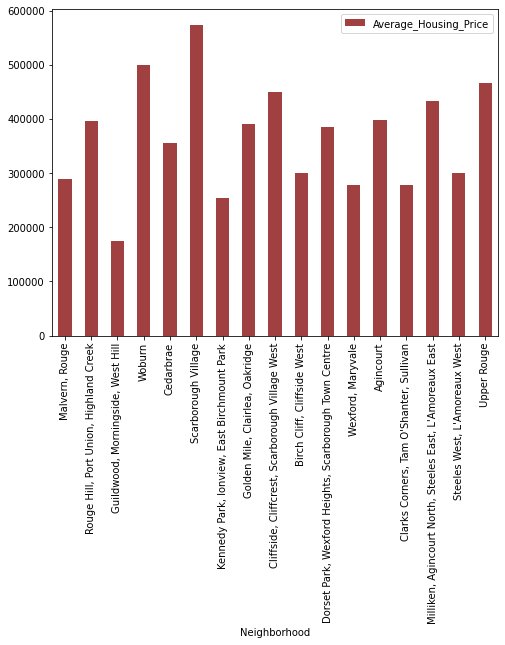

In [49]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(8,6),alpha=0.75, color =  'maroon')